# Activity 3 -- Two-photon (HOM) interference simulation

This lab module will focus on simulating photon statistics. Since photons are a quantum-mechanical phenomenon, measuring photon statistics allows us to directly probe the quantum-mechanical nature of light.

You will learn how to setup a Monte-Carlo quantum simulation of emitters coupled to electromagnetic modes. You will use correlations in single photon measurements to explore quantum-mechanical states that these systems generate, such as single photon or NOON states.

While we won't go into detail in this lab activity, these sorts of single photon intereference experiments form the basis of entanglement generation protocols, which allow entanglement to be shared between remote spins (see some of the optional reading at the end).

## Prelab Activity

Setup QuTip and reproduce the first example of the [Quantum Monte Carlo solver](https://qutip.org/docs/4.5/guide/dynamics/dynamics-monte.html).

## Headers and Imports

Import the necessary libraries and python packages. We will use [QuTiP](https://qutip.org/) for this exercise.

In [ ]:
!pip install qutip
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.1/30.1 MB 28.9 MB/s eta 0:00:00


## 1. Single atom decay

We will start off by looking at the statistics of photons from a emitter which has a spin-1/2 ground state: $|g_\downarrow\rangle$ & $|g_\uparrow\rangle$, and an optically excited state $|e\rangle$. We can represent these emitter states in QuTip with:

In [ ]:
Na = 3 # number of atomic levels
ground_down = basis(Na, 0)  # |g_down>
ground_up = basis(Na, 1)    # |g_up>
excited = basis(Na, 2)      # |e>

We would like to represent the coupling of the $|g_\downarrow\rangle_{s}\rightarrow|e\rangle_{s}$ transition with an EM field. We can assume this EM field is a cavity mode, with annihilation/creation operator $a/a^\dagger$. If the emitter interacts with the cavity with strength $g$, we can write the interaction Hamiltonian as:

$$\hat{H}/\hbar = g\left( \hat{a}|e\rangle\langle g_\downarrow| + \hat{a}^\dagger|g_\downarrow\rangle\langle e| \right)$$

or

$$\hat{H}/\hbar = g\left( \hat{a}\hat{\sigma}_{+}+\text{h.c.} \right)$$

where $\hat{\sigma}_{+} = |e\rangle\langle g_\downarrow|$.



In QuTip, this translates to

In [ ]:
N = 5 # Although Fock space fore cavity is infinite, we don't have infinite memory in our computer, so we simulate a maximum occupancy of 5 photons in the cavity
g0 = 2 # coupling strength (Rabi frequency of vacuum field)
a = tensor( destroy(N), qeye(Na) ) # annihiliation occurs of system A
# Here describes the interaction Hamiltonian
sigma = tensor(qeye(N), ground_down * excited.dag() ) # |g_down><e| of system A
H0_A = -g0 * ( sigma.dag()*a + a.dag()*sigma ) # time-independent Hamiltonian of system A

We next need to model the decay of the EM mode into the detector. This will be done using collapse operators that represent incoherent processes. In QuTip, this looks like:

In [ ]:
c_ops = [] # Set of collapse operators
e_ops = tensor(qeye(N), qeye(Na) )

K_c = 10 # rate for collapsing to detector
K_e = 10 # environment
c_ops.append(np.sqrt(K_c) * a) # Collapsing to detector 1        c_ops[0]
c_ops.append(np.sqrt(K_e) * a) # Collapsing to environment       c_ops[1] -- i.e. photon collection efficiency is K_c/(K_e+K_c)

Finally, we can run the simulation. We will use the [quantum Monte-Carlo method](https://qutip.org/docs/latest/guide/dynamics/dynamics-monte.html) to solve the incoherent processes:

In [ ]:
# Define simulation parameters
numb = 1000 # numbers of trajectories
time_scale=200
tmax = 4.0 # (ns)
t = np.linspace(0.0, tmax, time_scale+1) # Define time vector (0 to 4ns, 20ps resolution)

# Define initial state
photon_initial_state = basis(N, 0) # Initial photonic ground state state
spin_initial_state = excited # Initial spin state
psi0 = tensor(photon_initial_state, spin_initial_state) # Initial global state

# Simulate
output = mcsolve(H0_A, psi0, t, c_ops, e_ops, ntraj = numb, progress_bar=True)


/usr/local/lib/python3.11/dist-packages/qutip/solver/solver_base.py:479: FutureWarning: "progress_bar" is now included in options:
 Use `options={"progress_bar": False / True / "tqdm" / "enhanced"}`
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


10.0%. Run time:   2.13s. Est. time left: 00:00:00:19
20.0%. Run time:   4.45s. Est. time left: 00:00:00:17
30.0%. Run time:   9.31s. Est. time left: 00:00:00:21
40.0%. Run time:  11.95s. Est. time left: 00:00:00:17
50.0%. Run time:  15.39s. Est. time left: 00:00:00:15
60.0%. Run time:  17.63s. Est. time left: 00:00:00:11
70.0%. Run time:  20.77s. Est. time left: 00:00:00:08
80.0%. Run time:  22.62s. Est. time left: 00:00:00:05
90.0%. Run time:  25.25s. Est. time left: 00:00:00:02
100.0%. Run time:  27.08s. Est. time left: 00:00:00:00
Total run time:  27.10s


## Questions

1a. Plot the APD counts over a random set of 10 trajectories based on the output of the Quantum Monte Carlo simulation. Plot time on the x-axis and which collapse occured on the y-axis.

Hint: output.col_which[x] returns a list of which collapses occured on the xth trajectory, and output.col_times gives the time of each those collapses.


1b. Plot the detector counts over time when summing all the quantum Monte Carlo trajectories. This should be a histogram of counts over time.

1c. Investigate the variance of the number of photons detected over nblock=100. Compare this to the variance of an equally bright coherent laser source (i.e., with the same mean photon number). What is the ratio?

Hint: Lasers emit photons according to a Poisson process.

What do you think is the distribution of the number of photons emitted by our emitter?

1d. Re-run the above simulation with different atom-cavity coupling, $g_0$, say 0.5, 1, and 2. Plot your results and explain what you observe.

1e. We would next like to investigate the statistics of the photons being emitted by this system. One common way of doing this is by using an auto-correlation measurement where we measure a time delay between the single photon detection events while the atom is continuously excited. We can model the excitation with a semi-classical field of the form

$$ \Omega \big( \sigma + \sigma^\dagger \big) $$

Modify the single emitter code above to include the emitter driving using $g_0=2$ and $\Omega=.5$. For each Monte Carlo trajectory, count the the delay between every single photon event pair (incldue zero and negative delays) and show a histogram of the result. Explain why the histogram has the shape it does. How would this change if you had two driven emitters coupled to the cavity mode?

## 2. Two-Emitter interference

We would now like to simulate what happens when we interfere the photons from two emitters, A & B, in a Hong-Ou-Mandel (HOM) experiment shown schematically in the figure below.  In the T3E1 lab you will actually perform a HOM measurment with photon pairs from an SPDC source.  For further reference on the HOM measurement and its importance, please refer to the [text materials and lecture video on HOM for T3E1](content:t3e1:HOM)

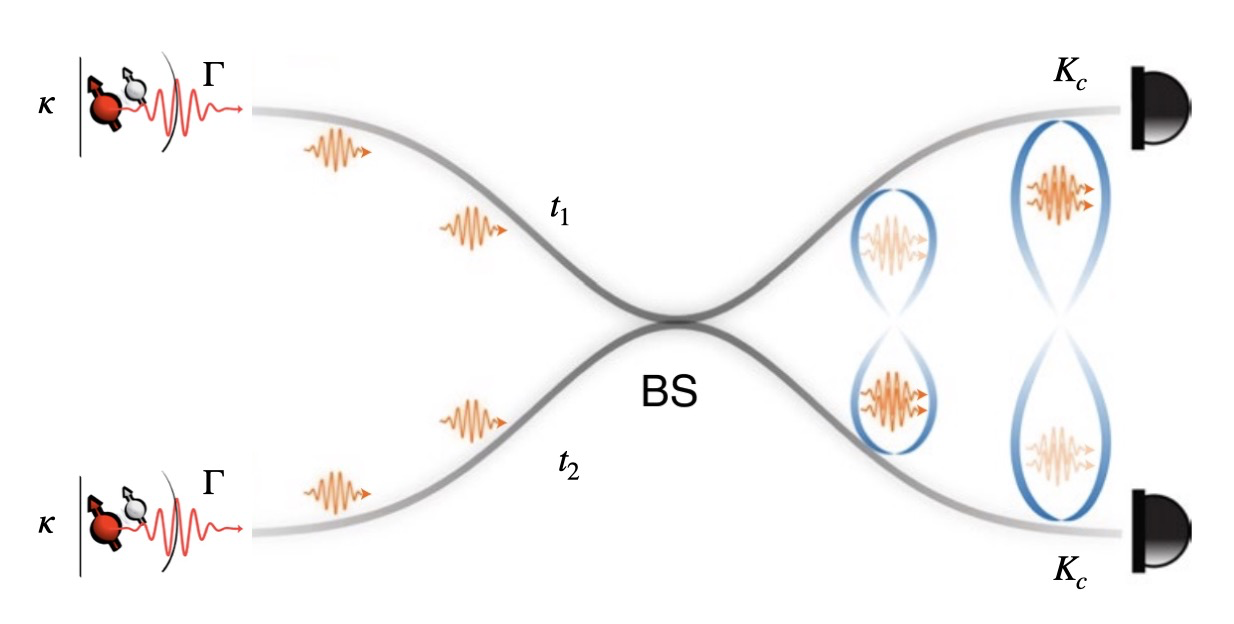

We would like simulate a more realistic setting, consisting of 3 steps:

**Step 1:** Prepare the initial state as the superposition state as: $|\psi_0\rangle=\frac{1}{\sqrt{2}}\left(|g_{\downarrow}0\rangle_A+|g_{\uparrow}0\rangle_A\right)\otimes\frac{1}{\sqrt{2}}\left(|g_{\downarrow}0\rangle_B+|g_{\uparrow}0\rangle_B\right)$.

**Step 2:** Excite the emitters with the time-dependent Hamiltonian that uses the semi-classical approximation:
$$\hat{H}_{\text{exc}}\left(t\right)/\hbar=\sum_{s=A,B}P_s(t)(|g_{\downarrow}\rangle\langle e|_s + |e\rangle\langle g_{\downarrow}|_s)$$

or

$$\hat{H}_{\text{exc}}\left(t\right)/\hbar=\sum_{s=A,B}P_s\left(t\right)\hat{\sigma}_{+,s}+\text{h.c.}$$

where $P_s\left(t\right)$ is the Rabi frequency of the excitation pulse. For simplicity, let's assume identical excitation pulses for systems A and B, $P_A(t) = P_B(t)$.

**Step 3:** Count the clicks that occur at detector $D_1$ or $D_2$, which are placed after a beam-splitter. Note that the beam-splitter mixes the A and B photon modes, such that it measures $(\hat{a}_A+\hat{a}_B)/\sqrt{2}$ and $(\hat{a}_A-\hat{a}_B)/\sqrt{2}$.

In the following, we provide the codes to simulate the HOM interferometer.

In [ ]:
# Here, let's choose the basis of state as |photon_A, spin_A, photon_B, spin_B>
N = 5 # Set where to truncate Fock state of cavity
sigma_A_gd_e = tensor(qeye(N), ground_down * excited.dag(), qeye(N), qeye(Na)) # |g_down><e| of system A
sigma_B_gd_e = tensor(qeye(N), qeye(Na), qeye(N), ground_down * excited.dag()) # |g_down><e| of system B
sigma_A_gd_gu = tensor(qeye(N), ground_down * ground_up.dag(), qeye(N), qeye(Na)) # |g_down><g_up| of system A
sigma_B_gd_gu = tensor(qeye(N), qeye(Na), qeye(N), ground_down * ground_up.dag()) # |g_down><g_up| of system B

In [ ]:
a_A = tensor(destroy(N), qeye(Na), qeye(N), qeye(Na)) # annihiliation operator of system A
a_B = tensor(qeye(N), qeye(Na), destroy(N), qeye(Na)) # annihiliation operator of system B
I = tensor(qeye(N), qeye(Na), qeye(N), qeye(Na)) # Unity operator

We would also like to include some more realistic loss processes, such as cavity loss and non-radiative decay. We can include these through some additional collapse operators,

In [ ]:
c_ops = [] # Set of collapse operators
e_ops = []
kappa =0.1 # Cavity decay rate
c_ops.append(np.sqrt(kappa) * a_A) # Cavity decay of system A. C0
c_ops.append(np.sqrt(kappa) * a_B) # Cavity decay of system B. C1

gamma =1 # Atomic decay rate
c_ops.append(np.sqrt(gamma) * sigma_A_gd_e) # spontaneous decay (decaying to modes other than cavity) from |e> to |g_down> of system A.   C2
c_ops.append(np.sqrt(gamma) * sigma_B_gd_e) # spontaneous decay (decaying to modes other than cavity) from |e> to |g_down> of system B.   C3

K_c = 10 # rate for collapsing to detector
c_ops.append(np.sqrt(K_c) * (a_A+a_B)/np.sqrt(2)) # Collapsing to detector 1        C4
c_ops.append(np.sqrt(K_c) * (a_A-a_B)/np.sqrt(2)) # Collapsing to detector 2        C5

In [ ]:
numb=200 # numbers of trajectories (affects runtime)
time_scale=200
tmax = 4.0 # (ns)
t = np.linspace(0.0, tmax, time_scale+1) # Define time vector (0 to 4ns, 20ps resolution)

# Step 1
theta=np.pi/4
photon = basis(N, 0) # Initial photonic state
spin = ground_down*np.cos(theta)+ground_up*np.sin(theta) # Initial spin state
psi0 = tensor(photon, spin, photon, spin) # Initial global state

g0 = 2 # coupling strength (Rabi frequency of vacuum field)
# Here describes the interaction Hamiltonian
H0_A = -g0 * (sigma_A_gd_e.dag()*a_A + a_A.dag()*sigma_A_gd_e) # time-independent Hamiltonian of system A
H0_B = -g0 * (sigma_B_gd_e.dag()*a_B + a_B.dag()*sigma_B_gd_e) # time-independent Hamiltonian of system B
H0 = H0_A + H0_B # time-independent Hermitian of global system

# Here describes the excitation Hamiltonian
H1_A = (sigma_A_gd_e.dag() + sigma_A_gd_e) # time-dependent Hamiltonian of system A after semi-classical approximation
H1_B = (sigma_B_gd_e.dag() + sigma_B_gd_e) # time-dependent Hamiltonian of system B after semi-classical approximation
e_ops.append(ket2dm(psi0).dag()* (ket2dm(psi0)))

# Excitation pulse parameters
center=0.6
life_time=0.2
peak =np.sqrt(np.pi)/2/life_time
excite_pulse_A = peak * np.exp(-((t-center) / life_time) ** 2)
excite_pulse_B = peak * np.exp(-((t-center) / life_time) ** 2)
#print(excite_pulse_A)


In [ ]:
#Step 2
H = [H0,[H1_A, excite_pulse_A],[H1_B, excite_pulse_B]]
output = mcsolve(H, psi0, t, c_ops, [], ntraj = numb, progress_bar=True)

10.0%. Run time:  18.11s. Est. time left: 00:00:02:42
20.0%. Run time:  30.83s. Est. time left: 00:00:02:03
30.0%. Run time:  37.45s. Est. time left: 00:00:01:27
40.0%. Run time:  59.76s. Est. time left: 00:00:01:29
50.0%. Run time:  70.33s. Est. time left: 00:00:01:10
60.0%. Run time:  76.54s. Est. time left: 00:00:00:51
70.0%. Run time:  85.84s. Est. time left: 00:00:00:36
80.0%. Run time:  91.99s. Est. time left: 00:00:00:22
90.0%. Run time: 100.99s. Est. time left: 00:00:00:11
100.0%. Run time: 107.17s. Est. time left: 00:00:00:00
Total run time: 107.48s


## Questions

2a: Adapt the code from before to get the counts in detectors 1 & 2 over time (summing across all trajectories).

Let's take a look at the experimental HOM interefernce data from [Zhai, Liang, et al. "Quantum interference of identical photons from remote GaAs quantum dots." Nature Nanotechnology 17.8 (2022): 829-833.]((https://www.nature.com/articles/s41565-022-01131-2))

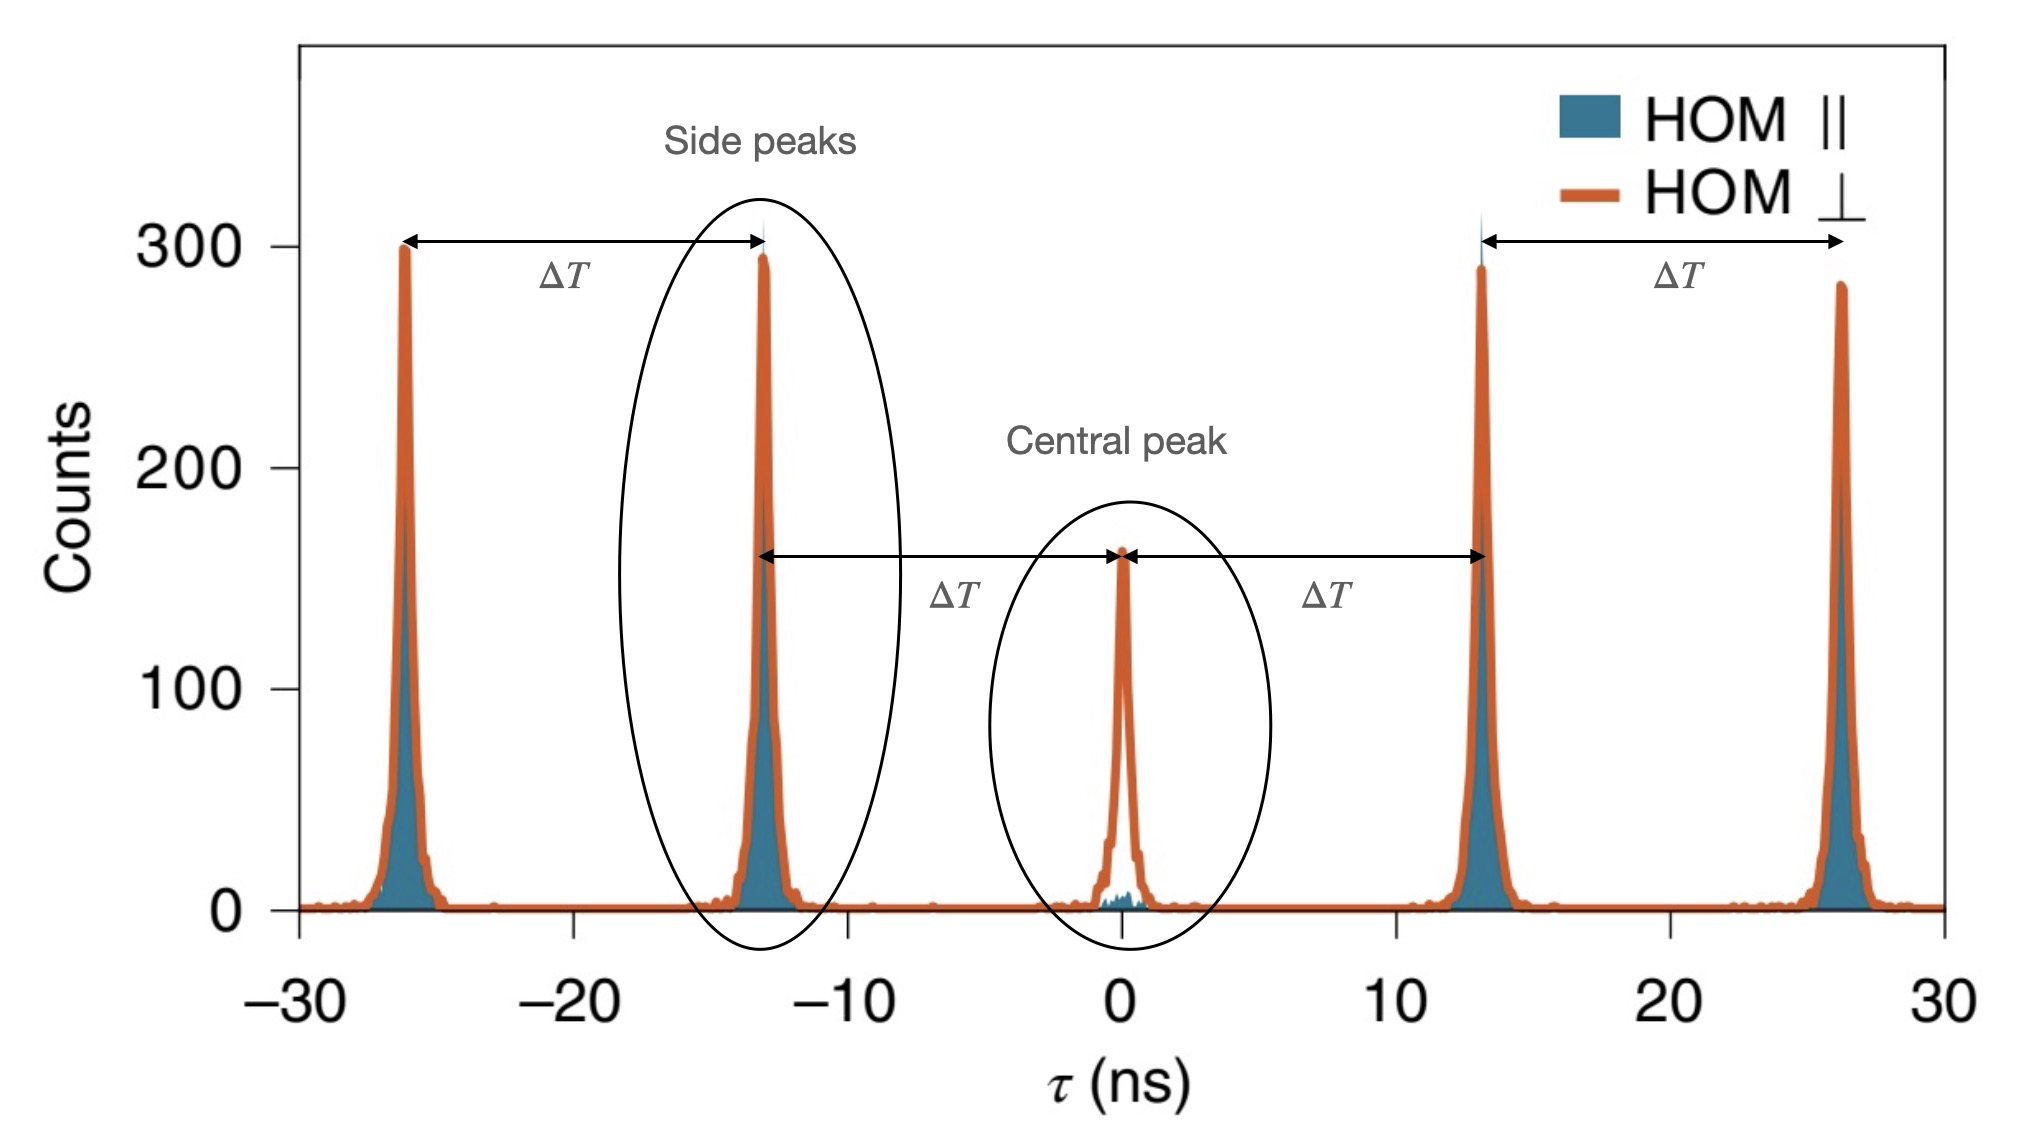

Here, Zhai et al. are repeatedely applying excitation pulses to two emitters A/B, and measuring the difference in time ($\tau$) between counts in detector D1/D2. This is called a correlation, or $g^2(\tau)$ measurement.

2b: Suppose you have an initial cavity mode state $\hat{a}^\dagger_A\hat{a}^\dagger_B|0\rangle$ (one photon in each A,B). By the beamsplitter transformation, the output modes have operators given by $\hat{c} = (\hat{a}+\hat{b})/\sqrt{2}$ and $\hat{d} = (\hat{a}-\hat{b})/\sqrt{2}$. What is the final state of the photon modes in terms of the output modes? If you were to detect these photons, what properties would they have? How does this relate to the HOM correlation at $\tau=0$?

Hint: write $\hat{a}$ and $\hat{b}$ in terms of $\hat{c}$ and $\hat{d}$.

2c. Write the code for calculating the second order coincicent counting $g^2$($\tau$) for the central peak. Plot the result.

Hint: Look at coincidences (where one photon goes to each detector) within each trajectory.

2d. Write the code for calculating the second order coincicent counting $g^2$($\tau$) for the side peak. Plot the result.

Hint: You can assume that neighbouring Monte Carlo trajectories come from different excitation pulses

2e: In the case where the photons have perpendicular polarisations, what should $g^2_{\perp}(0)$ be?

To quantify the quality of the photon interference, we can define the visibility:

$g^2_{||}$ = $I_{\text{central peak}}/I_{\text{side peak}}$ (For || case)

$g^2_{\perp}$ = $I_{\text{central peak}}/I_{\text{side peak}}$ (For $\perp$ case, which the result of 2e can be used)

$V=1-g^2_{||}/g^2_{\perp}$

2f: Calculate the visibility based on your result in 2b and 2c. Why isn't visibility 1?

2g: Plot the relationship of the coincidence window size and visibility. You many need to increase the number of trajectories to get more data.


## 3. Optional

3a. Modify the code to add the time delay $\Delta t$ of the arrival photon, calculate the coincident peaks for central peak and side peaks seperately. Provide the relation for the visibility and the  $\Delta t$.

Some dt sweep result is like this:

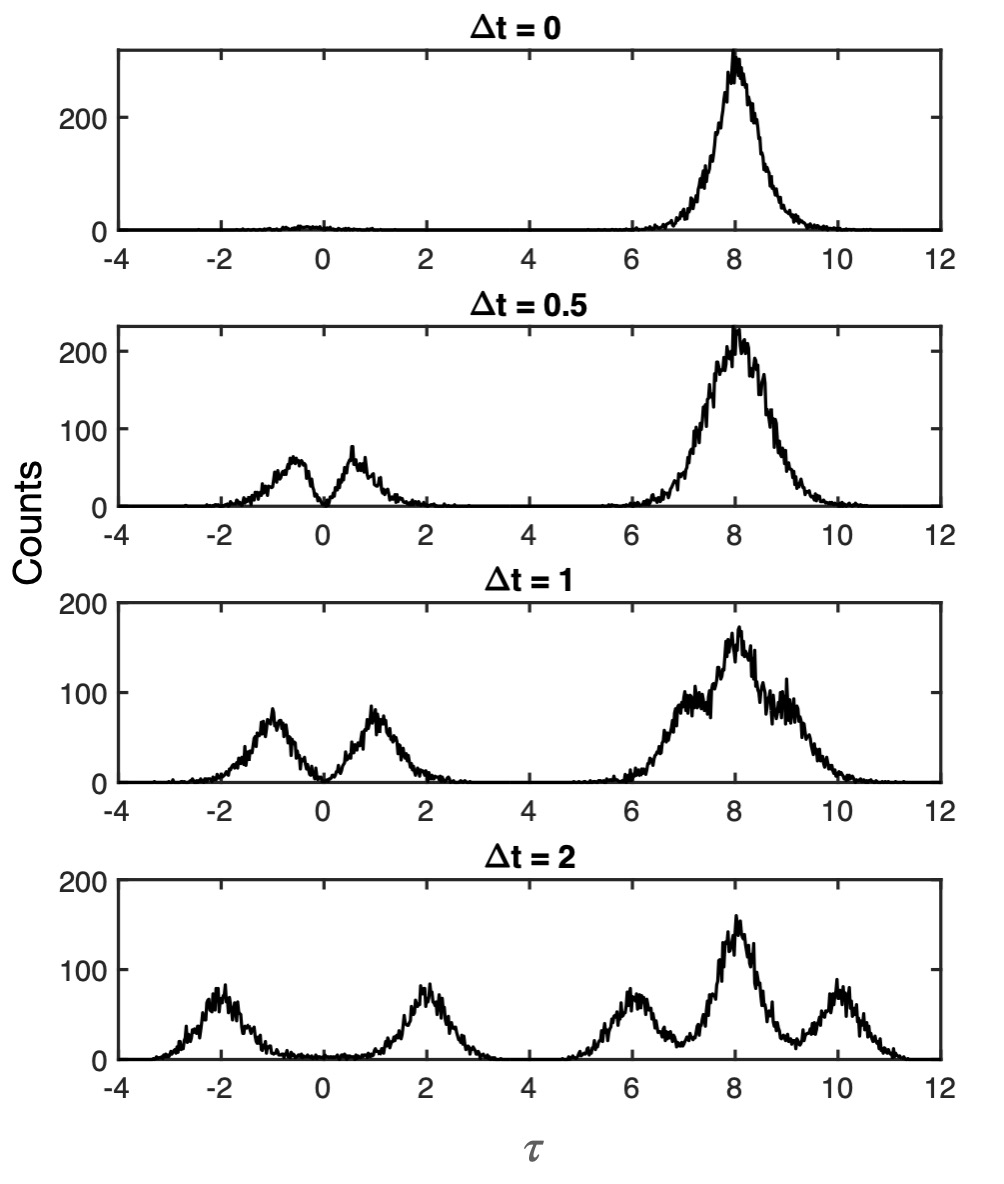

3b. (Optional) Modify the code to add the frequency detuning $\Delta f$ of the two quantum emitters system A and B, calculate the coincident peaks for central peak and side peaks seperately. Provide the relation for the visibility and the  $\Delta f$.

Hint: You only need to change the H0 to include the detuning term $\Delta f$ in the Hamiltonian。

Some example detuning from the reference [1] are attached below, which is the expected simulation result when have large enough frequency detuning.

[[1]](https://www.nature.com/articles/s41565-022-01131-2).  Zhai, Liang, et al. "Quantum interference of identical photons from remote GaAs quantum dots." Nature Nanotechnology 17.8 (2022): 829-833.

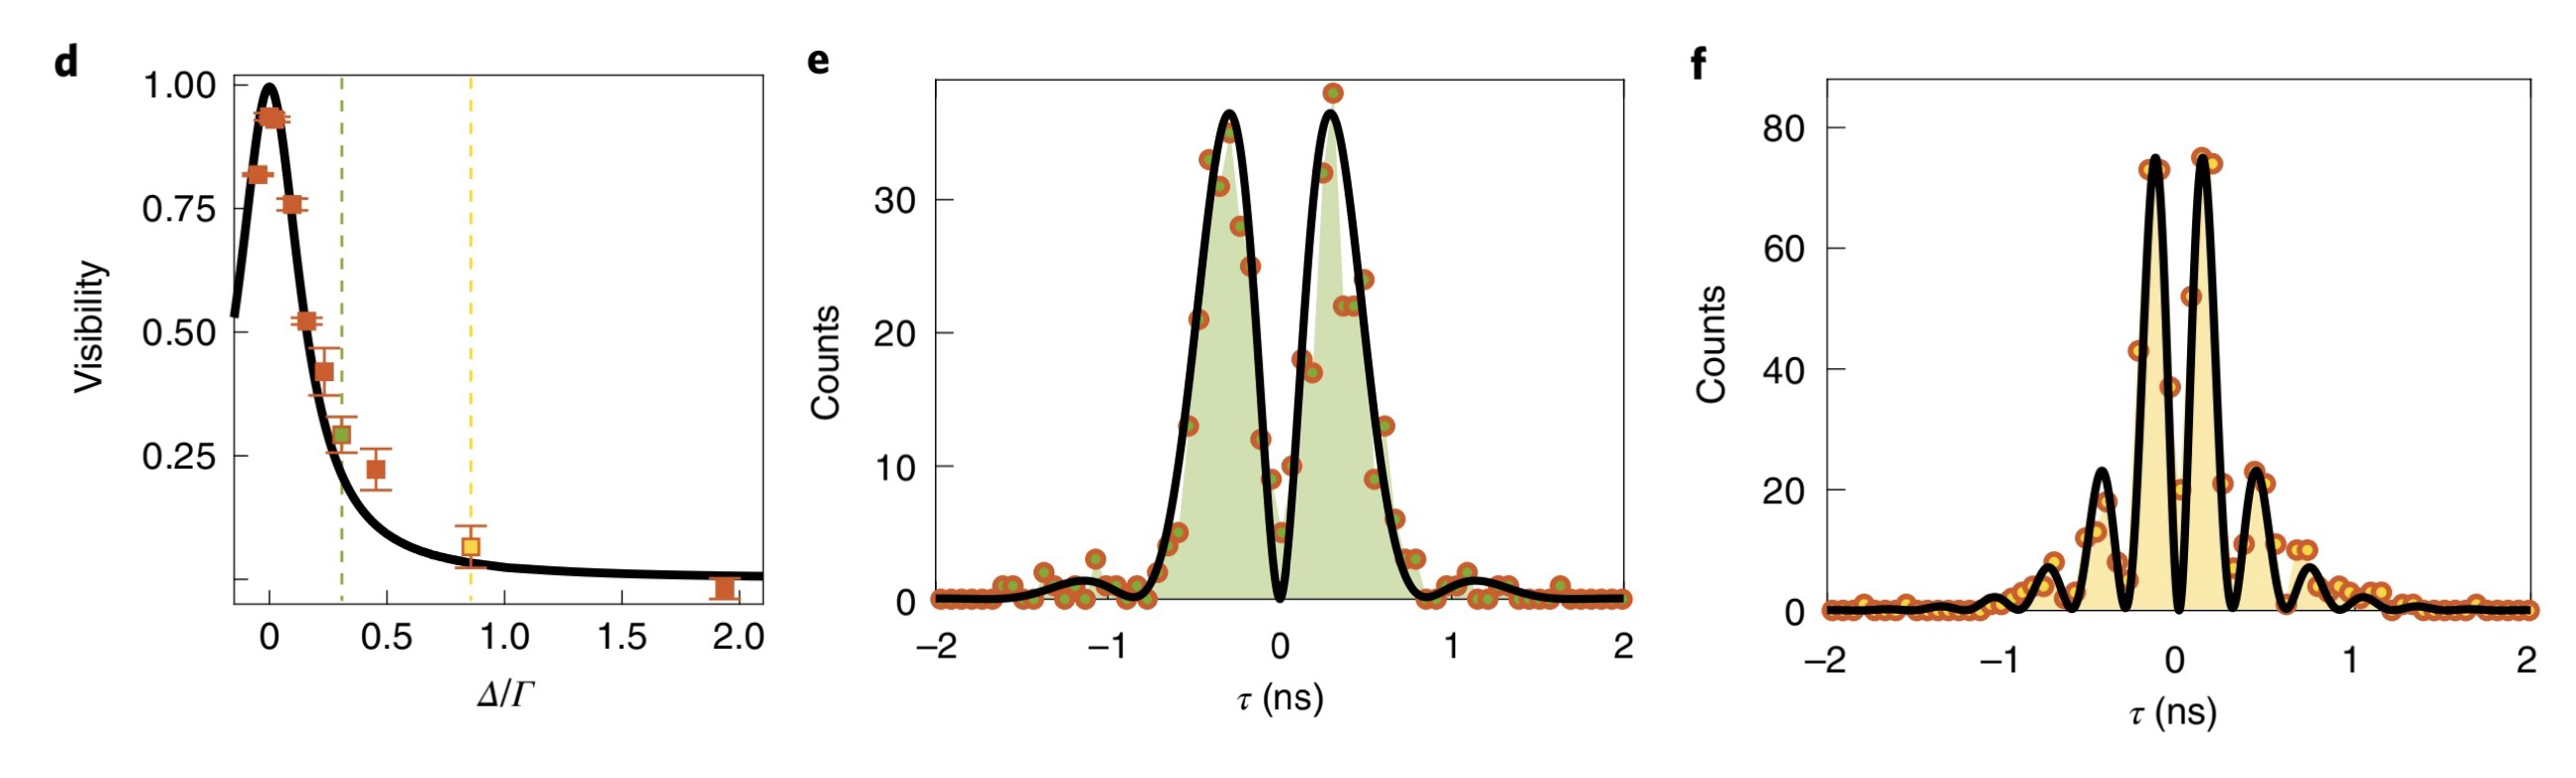

This is an example simulation that can be done with this QuTip simulation with different $\Delta f$.

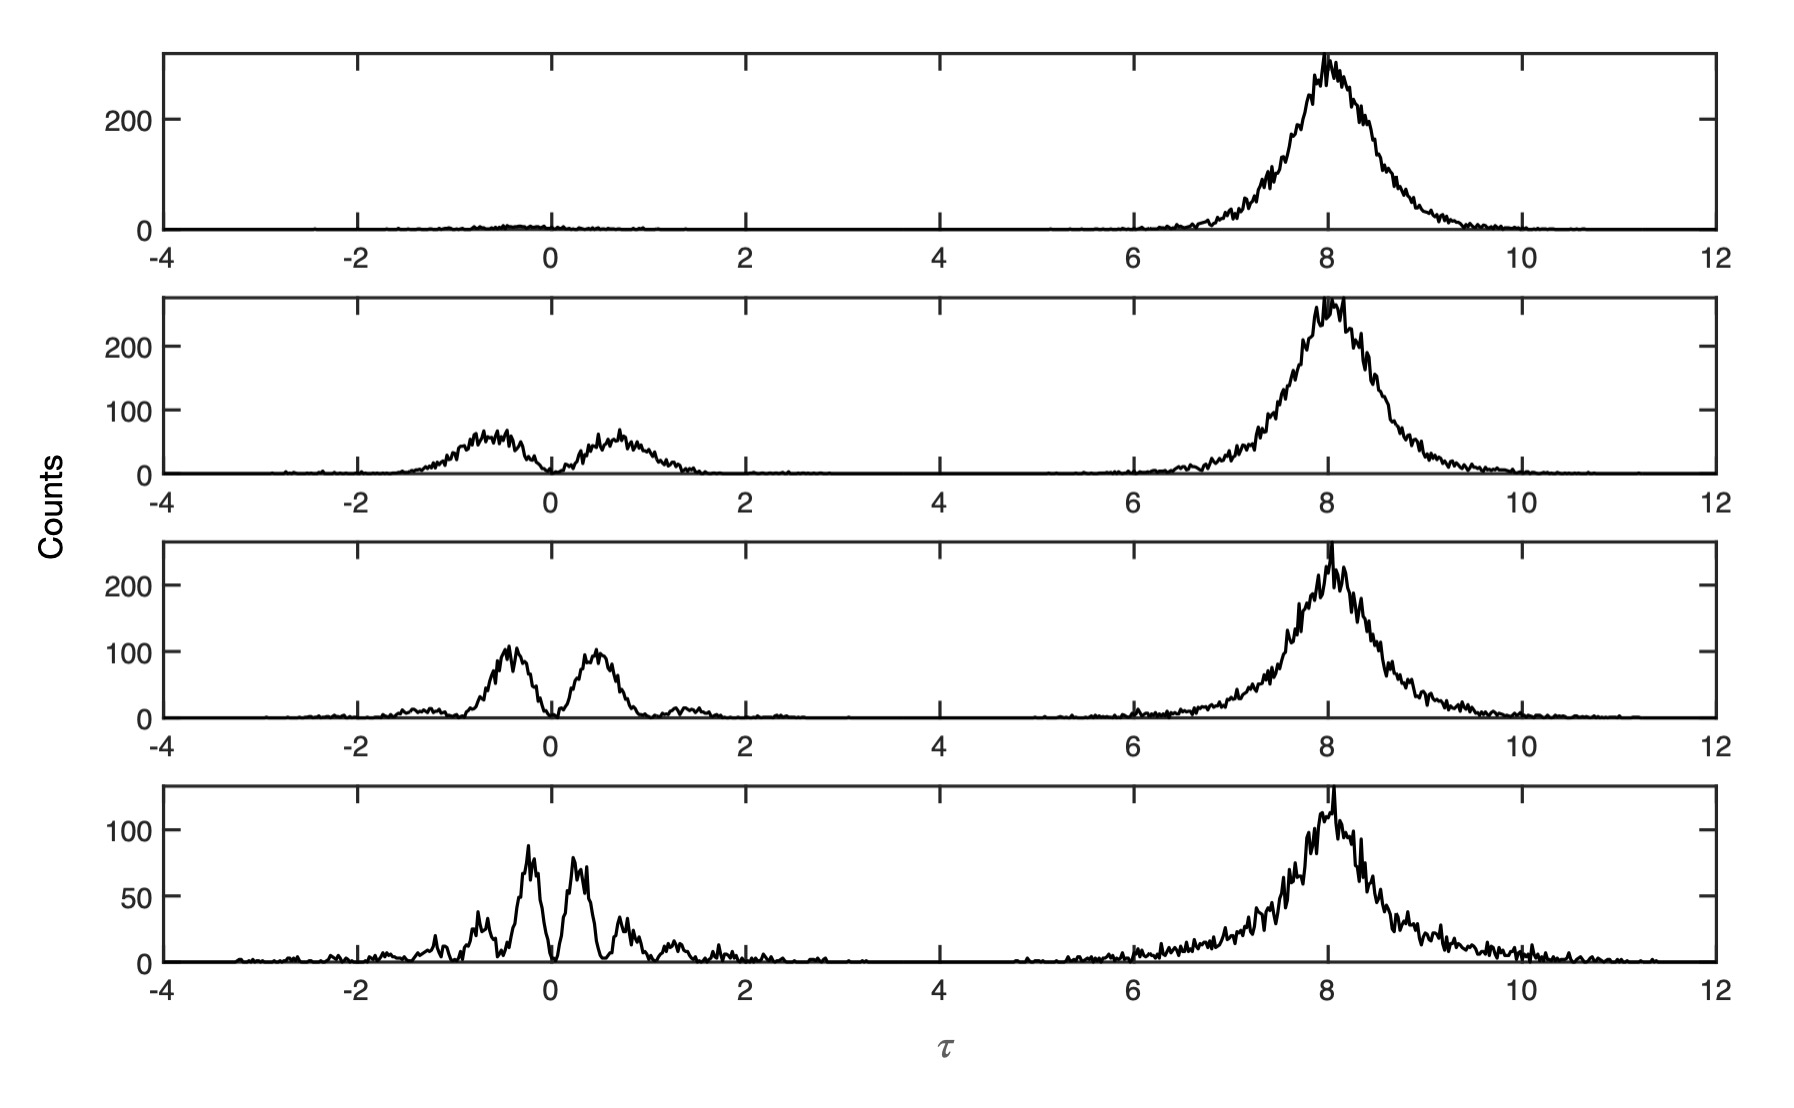

Some df sweep result is like this

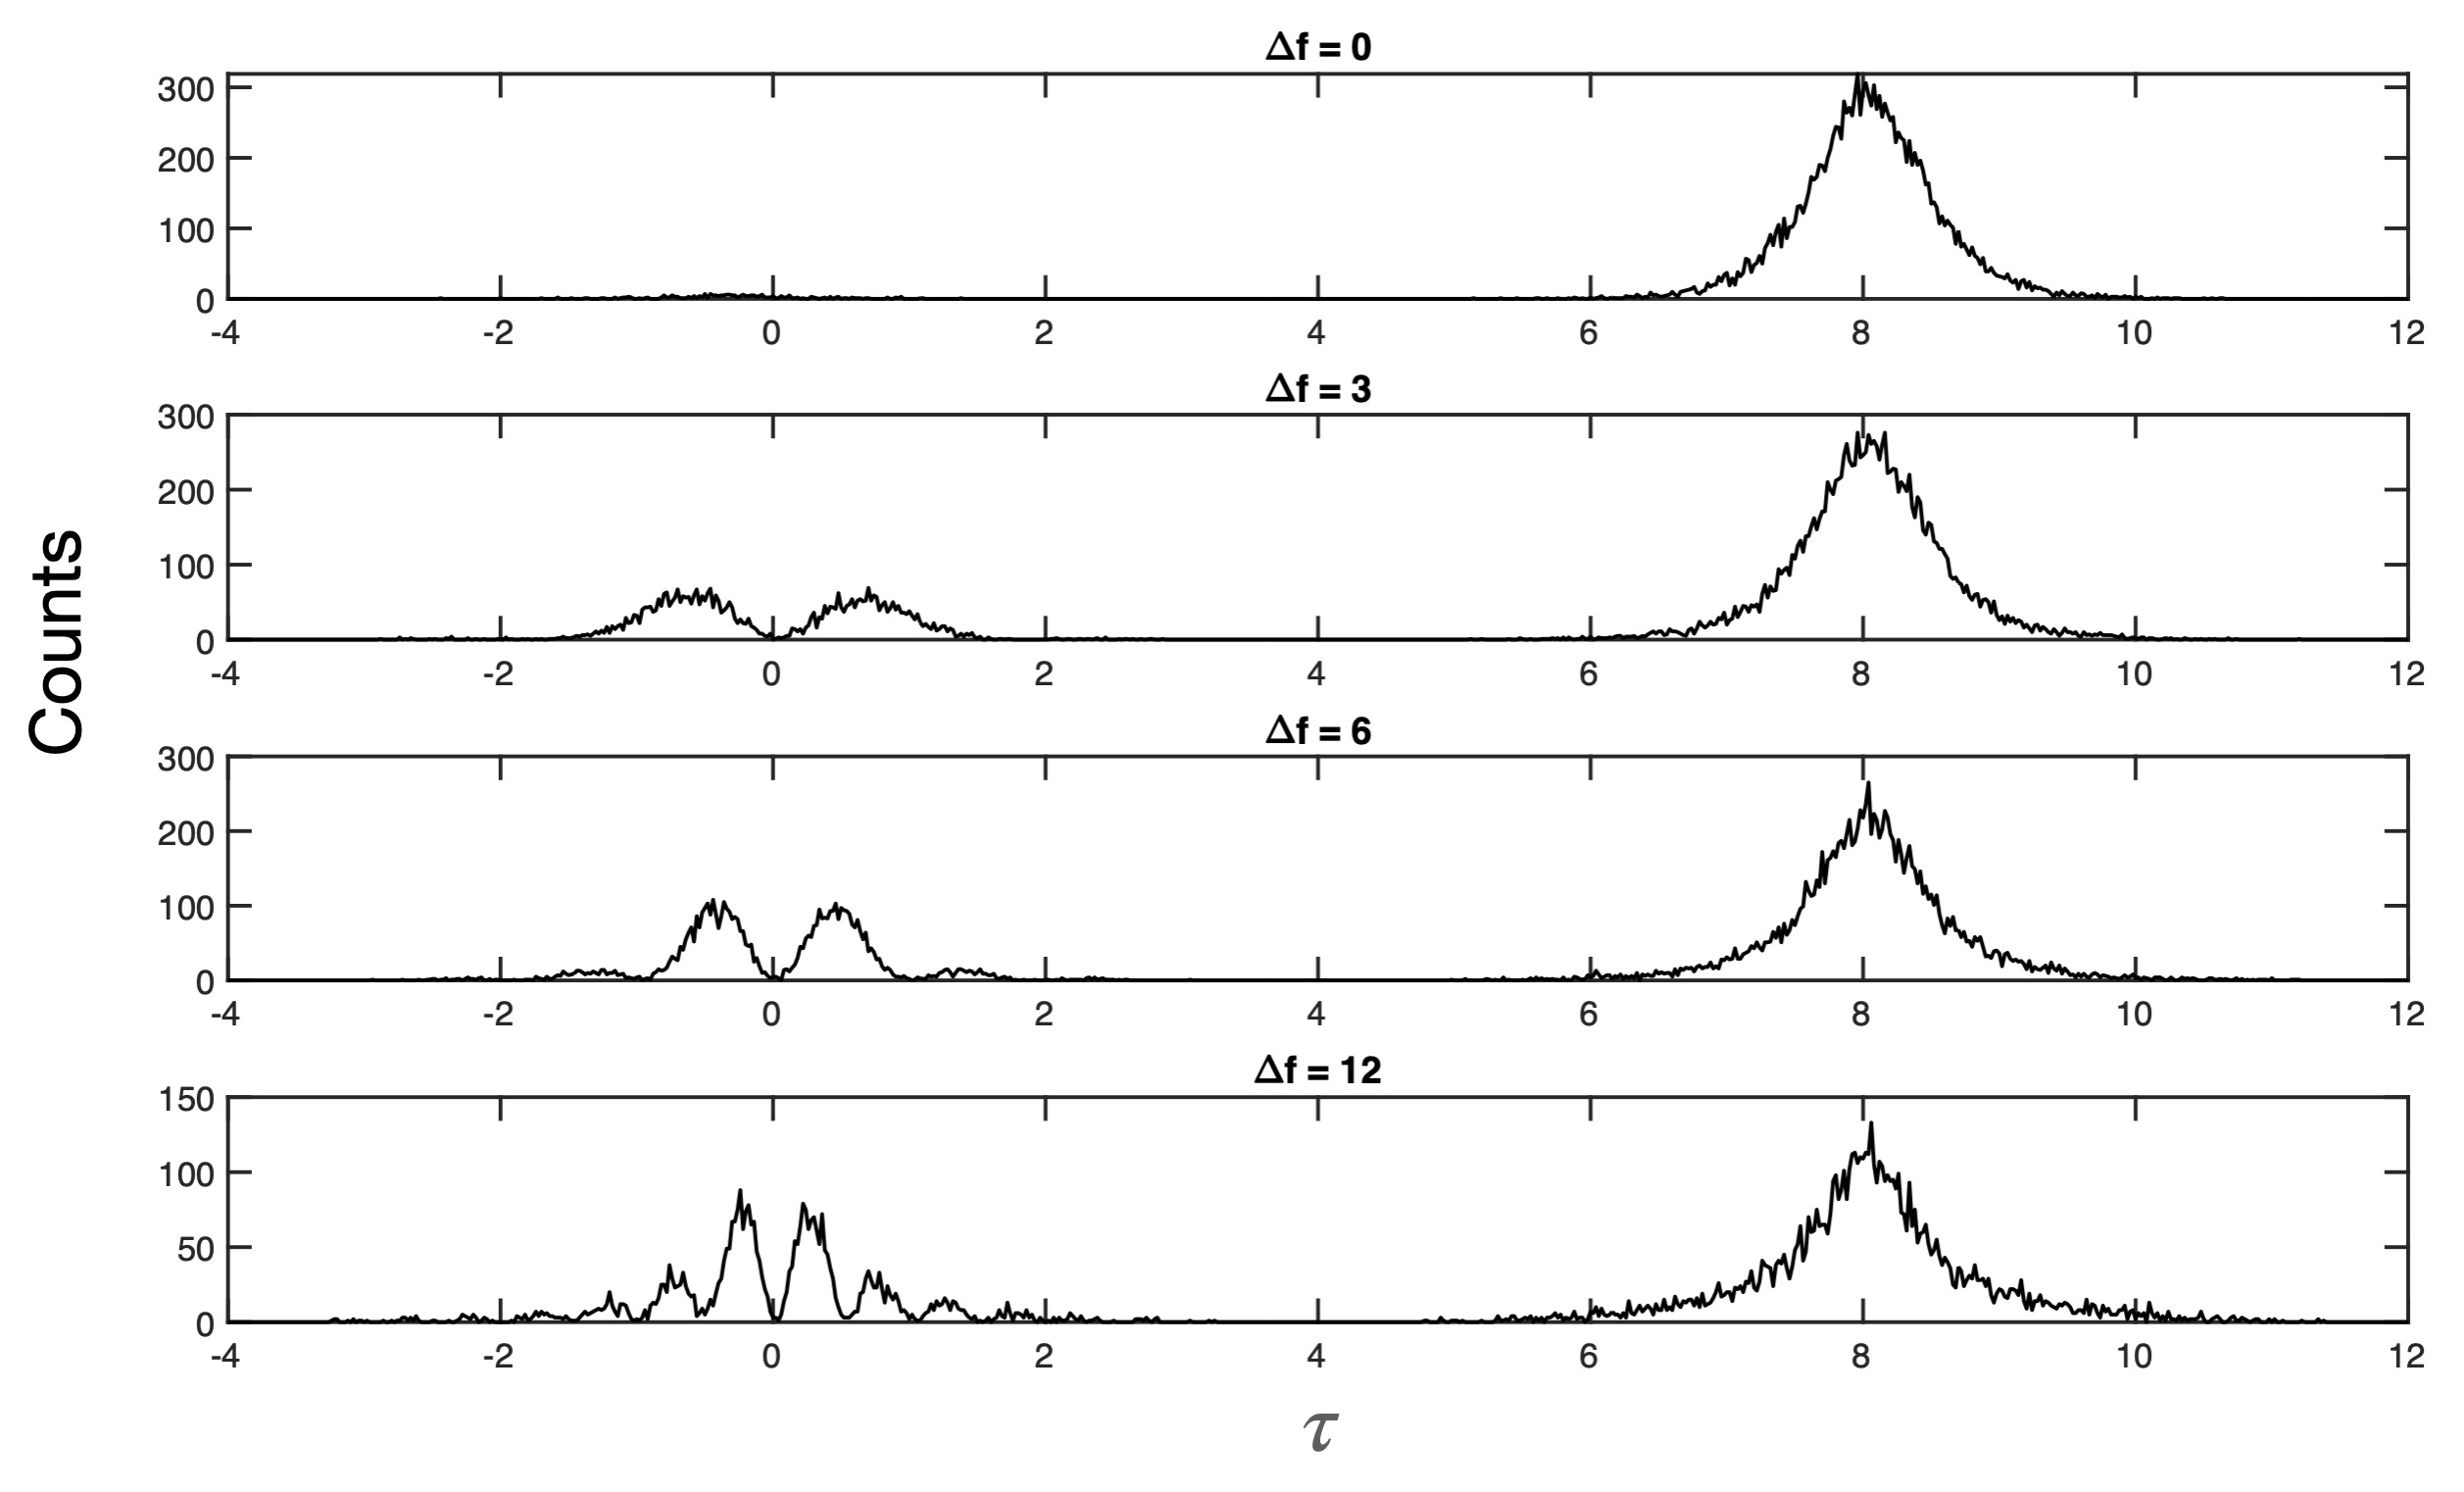

4c. (Open question) What other experimental effects can affect the HOM visibility? How to modify the code to simulate them?

* Extra reading:

From here, we know the importance of having the close photon arrival time and frequency alignment for the high visibility interference. The visibility will set a fidelity upper bound for the two quantum emitter entanglement. For the experimental hardware architecture that can realize the close arrival time and tunable quantum emitter frequency in a large scale, please read the following paper [2]:



[[2]](https://arxiv.org/abs/2308.14289). Li, Linsen, et al. "Heterogeneous integration of spin-photon interfaces with a scalable CMOS platform." 	arXiv:2308.14289. (2023)